# Coding Exercise 14
The following exercise using the 'yelp_academic_dataset_review_Nov3033_small.jsonl' file to complete the following task.

## Task 1
For each review use 'spacytextblob'and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating and the y-axis being the calculated polarity scores. Interpret the results.

In [40]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [41]:
import json

with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'r') as f:
    ratings=[]
    polarity_scores=[]
    subjective_scores=[]
    review_ids=[]
    subjective_phrases=[]
    for line in f:
        review_dict = json.loads(line)
        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']
        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        polarity_score = 0
        subjective_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            polarity_score += assess_tuple[1]
            subjective_score += assess_tuple[2]
        ratings.append(rating)
        polarity_scores.append(polarity_score)
        subjective_scores.append(subjective_score)
        review_ids.append(review_id)
        subjective_phrases.append(subjective_phrases_in_doc)

In [42]:
import pandas as pd
df = pd.DataFrame(columns=['review_id', 'rating', 'polarity_score', 'subjective_score'])
df['rating']=ratings
df['review_id']=review_ids
df['polarity_score']=polarity_scores
df['subjective_score']=subjective_scores
df['subjective_phrases']=subjective_phrases
df

,review_id,rating,polarity_score,subjective_score,subjective_phrases
0,KU_O5udG6zpxOg-VcAEodg,3.0,1.023333,5.148333,"[aware, multiple !, other, bad, good, very lon..."
1,BiTunyQ73aT9WBnpR9DZGw,5.0,4.425000,6.283333,"[nice, clean, amazing, top, fit, easy, advance..."
2,saUsX_uimxRlCVr67Z4Jig,3.0,1.539286,5.745238,"[large, chicken, fresh, good, mexican, long, f..."
3,AqPFMleE6RsU23_auESxiA,5.0,2.420455,5.704545,"[wow !, different, delicious, favorite, differ..."
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,5.613571,6.872857,"[cute, great, beautiful, very good, very, real..."
...,...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,5.0,1.800000,1.875000,"[excellent, same, great]"
9996,UIkEO-10J6Y99IhRqUflvg,5.0,0.600000,0.900000,[amazing]
9997,S-NQM3Axcg8JS3MXHUIvyw,5.0,1.097727,6.900758,"[outstanding !, great !, other, new, new, bad ..."
9998,ME79YrEhm2xe4IQy_0zkGw,5.0,2.812500,4.800000,"[nice, calm, dimly, red, loved, pretty !, grea..."


In [43]:
yelp_df.describe()

,polarity_score,subjective_score,ratings
count,10000.000000,10000.000000,10000.000000
mean,2.628267,6.472902,3.854300
std,2.597190,5.194391,1.346719
min,-6.522330,0.000000,1.000000
25%,1.036301,3.100000,3.000000
50%,2.300000,5.065000,4.000000
75%,3.802841,8.176865,5.000000
max,28.070649,59.124542,5.000000


<AxesSubplot:xlabel='rating', ylabel='polarity_score'>

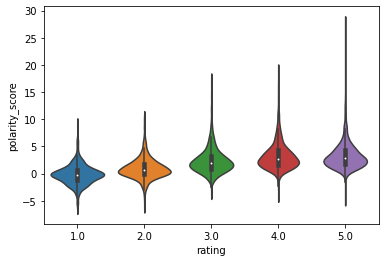

In [44]:
import seaborn as sns
sns.violinplot(data=df, x='rating', y='polarity_score')

## Task 2
For each review included in the dataset, extract the subjective phrases in the text with 'spacytextblob' and its 'sentiment_assessments.assessments' feature.

In [45]:
target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", "PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

Note extracting the subjective phrases was completed in the task above within the loop.

For each of the target reviews, what are the top 3 reviews that are most similar to it in terms of their subjective phrases?

In [53]:
import numpy as np
phrases=set()
for i in df.index:
    for j in df.iloc[i]['subjective_phrases']:
        phrases.add(j)
phrases=list(phrases)
#collection of all possible subjective phrases

In [66]:
from scipy.spatial.distance import cosine
for each in target_review_ids:
    target=df[df['review_id']==each]
    primary=target['subjective_phrases']
    print(primary)
    encodings=[]
    for i in df.index:
        review=df.iloc[i]['subjective_phrases']
        indicies=[]
        for j in review:
            if j in phrases:
                indicies.append(phrases.index(j))
        one_hot_encoding=np.zeros(len(phrases))
        for index in indicies:
            one_hot_encoding[index]=1
        encodings.append(one_hot_encoding)
    similar=[]
    for i in range(1,len(df)):
        similar.append(1-cosine(encodings[0],encodings[i]))
    similar_df=pd.DataFrame(columns=["review_id","similarity_value"])
    similar_df["review_id"]=df.loc[1:,"review_id"]
    similar_df["similarity_value"]=similar
    similar_df=similar_df.sort_values(by="similarity_value",ascending=False)
    print("Target Subjective Phrases:",primary)
    print(similar_df[:3])

32    [great, nice, clean, huge]
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 32    [great, nice, clean, huge]
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
39    [amazing, blank, great, highly, busy]
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 39    [amazing, blank, great, highly, busy]
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
96    [great ! ! ! ! ! ! ! ! !, completely new, othe...
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 96    [great ! ! ! ! ! ! ! ! !, completely new, othe...
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
66    [only, awesome !, freshly filled, phenomenal, ...
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 66    [only, awesome !, freshly filled, phenomenal, ...
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
73    [plain, unable, back, actual, back, awkwardly,...
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 73    [plain, unable, back, actual, back, awkwardly,...
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
84    [seriously, chicken, good]
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 84    [seriously, chicken, good]
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
424    [half, completely, top, surprised, sweet, very...
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 424    [half, completely, top, surprised, sweet, very...
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0
347    [rarely, honestly, worst, objectively horrible...
Name: subjective_phrases, dtype: object


/Users/sarahpenrice/opt/anaconda3/envs/compsoc/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Target Subjective Phrases: 347    [rarely, honestly, worst, objectively horrible...
Name: subjective_phrases, dtype: object
                   review_id  similarity_value
4281  JI_89Ib6UMPS0Sb3-jyshA               1.0
4741  sZdPZLfzDXtCqVVHKiACuw               1.0
1710  J8KTnbCtArCsPKynC4TwyA               1.0


What is the rating of each of the target reviews? What are the ratings of their top 3 most similar reviews? Are they correlated? Interpret the results.